<a href="https://colab.research.google.com/github/Teja2915/Spend-AI/blob/main/CIA_3(Team_5)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install mediapipe
!pip install numpy==1.23.5
!pip install opencv-python-headless==4.7.0.72


  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [8]:
from IPython.display import Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import base64

def take_photo():
    js = Javascript('''
        async function takePhoto() {
          const video = document.createElement('video');
          document.body.appendChild(video);

          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          video.srcObject = stream;
          await video.play();

          // Wait for 1 second for camera to adjust
          await new Promise(resolve => setTimeout(resolve, 1000));

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          const ctx = canvas.getContext('2d');
          ctx.drawImage(video, 0, 0);

          stream.getTracks()[0].stop();
          video.remove();

          return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js('takePhoto()')

    img_bytes = base64.b64decode(data.split(",")[1])
    img_arr = np.frombuffer(img_bytes, np.uint8)
    img = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)
    return img


In [9]:
import mediapipe as mp
import math

def calculate_EAR(landmarks, eye_points):
    A = math.dist(landmarks[eye_points[1]], landmarks[eye_points[5]])
    B = math.dist(landmarks[eye_points[2]], landmarks[eye_points[4]])
    C = math.dist(landmarks[eye_points[0]], landmarks[eye_points[3]])
    EAR = (A + B) / (2.0 * C)
    return EAR

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True
)


In [11]:
left_eye = [33, 159, 158, 133, 153, 144]
right_eye = [362, 385, 386, 263, 380, 373]

EAR_THRESHOLD = 0.25

for i in range(10):  # capture 10 frames
    print("\nTaking frame", i+1)
    img = take_photo()

    if img is None:
        print("❌ No frame captured")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if not results.multi_face_landmarks:
        print("No face detected")
        continue

    h, w, _ = img.shape
    points = [(int(l.x*w), int(l.y*h)) for l in results.multi_face_landmarks[0].landmark]

    left_EAR = calculate_EAR(points, left_eye)
    right_EAR = calculate_EAR(points, right_eye)
    EAR = (left_EAR + right_EAR) / 2

    print("EAR:", round(EAR, 3))

    if EAR < EAR_THRESHOLD:
        print("⚠️ DROWSINESS DETECTED ⚠️")
    else:
        print("🙂 Eyes Open")



Taking frame 1


<IPython.core.display.Javascript object>

EAR: 0.346
🙂 Eyes Open

Taking frame 2


<IPython.core.display.Javascript object>

EAR: 0.349
🙂 Eyes Open

Taking frame 3


<IPython.core.display.Javascript object>

EAR: 0.349
🙂 Eyes Open

Taking frame 4


<IPython.core.display.Javascript object>

EAR: 0.35
🙂 Eyes Open

Taking frame 5


<IPython.core.display.Javascript object>

EAR: 0.341
🙂 Eyes Open

Taking frame 6


<IPython.core.display.Javascript object>

EAR: 0.203
⚠️ DROWSINESS DETECTED ⚠️

Taking frame 7


<IPython.core.display.Javascript object>

EAR: 0.194
⚠️ DROWSINESS DETECTED ⚠️

Taking frame 8


<IPython.core.display.Javascript object>

EAR: 0.211
⚠️ DROWSINESS DETECTED ⚠️

Taking frame 9


<IPython.core.display.Javascript object>

No face detected

Taking frame 10


<IPython.core.display.Javascript object>

EAR: 0.284
🙂 Eyes Open


📸 Starting Capture...

Frame 1 of 20


<IPython.core.display.Javascript object>

EAR: 0.27
✔ Saved eyes-open frame

Frame 2 of 20


<IPython.core.display.Javascript object>

EAR: 0.23
⚠ Saved drowsy frame

🟢 Eyes Open Frame (High EAR):


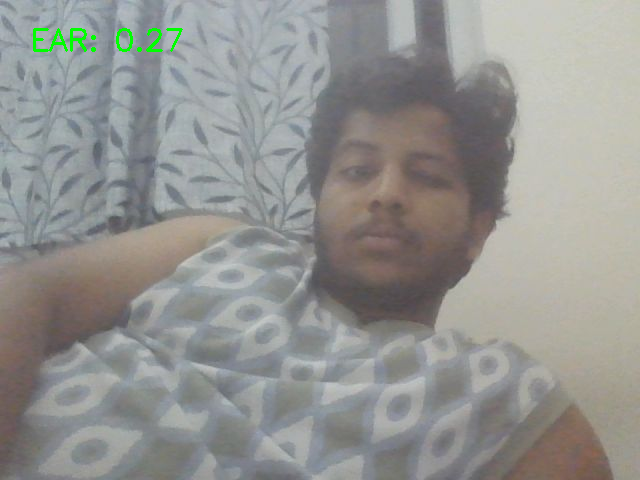


🔴 Drowsiness Frame (Low EAR):


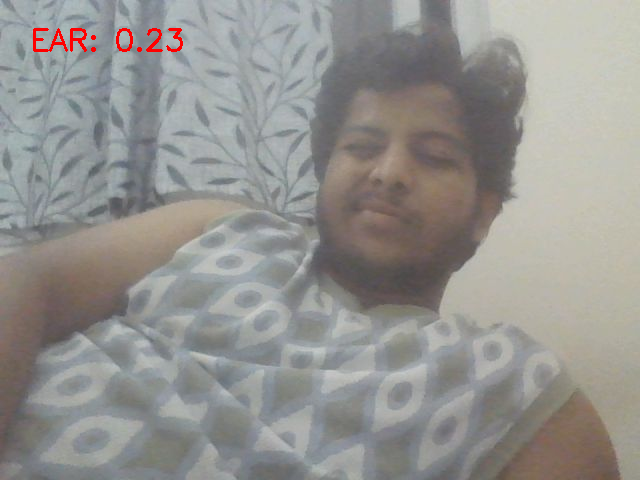


✅ Images saved as 'eyes_open.jpg' and 'drowsy.jpg'


In [13]:
import cv2
from google.colab.patches import cv2_imshow

left_eye = [33, 159, 158, 133, 153, 144]
right_eye = [362, 385, 386, 263, 380, 373]

EAR_THRESHOLD = 0.25

eyes_open_frame = None
eyes_open_EAR = None

drowsy_frame = None
drowsy_EAR = None

print("📸 Starting Capture...")

for i in range(20):
    print(f"\nFrame {i+1} of 20")
    img = take_photo()

    if img is None:
        print("❌ Frame not captured")
        continue

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if not results.multi_face_landmarks:
        print("No face detected")
        continue

    h, w, _ = img.shape
    points = [(int(l.x*w), int(l.y*h)) for l in results.multi_face_landmarks[0].landmark]

    left_EAR = calculate_EAR(points, left_eye)
    right_EAR = calculate_EAR(points, right_eye)
    EAR = (left_EAR + right_EAR) / 2

    print("EAR:", round(EAR, 3))

    # Save eyes-open image (HIGH EAR)
    if EAR > EAR_THRESHOLD and eyes_open_frame is None:
        eyes_open_frame = img.copy()
        eyes_open_EAR = round(EAR, 3)
        print("✔ Saved eyes-open frame")

    # Save drowsy image (LOW EAR)
    if EAR < EAR_THRESHOLD and drowsy_frame is None:
        drowsy_frame = img.copy()
        drowsy_EAR = round(EAR, 3)
        print("⚠ Saved drowsy frame")

    # Stop if both images are captured
    if eyes_open_frame is not None and drowsy_frame is not None:
        break

# Display results
if eyes_open_frame is not None:
    cv2.putText(eyes_open_frame, f"EAR: {eyes_open_EAR}", (30, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    print("\n🟢 Eyes Open Frame (High EAR):")
    cv2_imshow(eyes_open_frame)
    cv2.imwrite("eyes_open.jpg", eyes_open_frame)

if drowsy_frame is not None:
    cv2.putText(drowsy_frame, f"EAR: {drowsy_EAR}", (30, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    print("\n🔴 Drowsiness Frame (Low EAR):")
    cv2_imshow(drowsy_frame)
    cv2.imwrite("drowsy.jpg", drowsy_frame)

print("\n✅ Images saved as 'eyes_open.jpg' and 'drowsy.jpg'")
